# Keras를 이용한 손글씨 인식 딥러닝
- Tensorflow로 작성된 프로그램은 sklearn Library를 사용할 때보다 어렵다.
- Keras는 머신러닝 라이브러리 테아노(Theano)와 Tensorflow를 Wrapping한 라이브러리


In [2]:
import pandas as pd
train = pd.read_csv("../Data/train_20k.csv",header=None)
test = pd.read_csv("../Data/test_1k.csv",header=None)
print(train.head())
print(test.head())
print(train.count())
print(test.count())

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    5    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    9    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]
   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    7    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    2    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    1    0    0    0    0    0    0    0    0    0

---
# Preprocessing(전처리)

In [5]:
# null
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


> null값 없음

In [13]:
# train과 test를 Feature와 Target으로 분리하고 정규화하기
train_label = train.iloc[:,0]
train_data = train.iloc[:,1:]
train_data = train_data / 255

test_label = test.iloc[:,0]
test_data = test.iloc[:,1:]
test_data = test_data / 255

In [22]:
print(train_data.shape)
print(train_label.shape)

(20001, 784)
(20001,)


# Deep Learning 만들기

In [15]:
# GPU 사용 설정

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [16]:
from tensorflow import keras

In [17]:
model = keras.Sequential()
model.add(keras.layers.Dense(512, activation='tanh',input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))


In [23]:
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [42]:
import numpy as np
model.fit(
    np.array(train_data),
    np.array(train_label),
    epochs=50
)

Epoch 1/50
626/626 [==============================] - 1s 1ms/step - loss: 7.7810e-05 - accuracy: 1.0000
Epoch 2/50
626/626 [==============================] - 1s 1ms/step - loss: 6.2840e-05 - accuracy: 1.0000
Epoch 3/50
626/626 [==============================] - 1s 1ms/step - loss: 5.0929e-05 - accuracy: 1.0000
Epoch 4/50
626/626 [==============================] - 1s 1ms/step - loss: 4.2001e-05 - accuracy: 1.0000
Epoch 5/50
626/626 [==============================] - 1s 1ms/step - loss: 3.4775e-05 - accuracy: 1.0000
Epoch 6/50
626/626 [==============================] - 1s 1ms/step - loss: 2.8771e-05 - accuracy: 1.0000
Epoch 7/50
626/626 [==============================] - 1s 1ms/step - loss: 2.3815e-05 - accuracy: 1.0000
Epoch 8/50
626/626 [==============================] - 1s 1ms/step - loss: 1.9737e-05 - accuracy: 1.0000
Epoch 9/50
626/626 [==============================] - 1s 1ms/step - loss: 1.6993e-05 - accuracy: 1.0000
Epoch 10/50
626/626 [==============================] - 1s 1ms/st

In [41]:
# 테스트 데이터로 평가하기
score = model.evaluate(test_data,test_label)
print('loss :',score[0])
print('accuracy :',score[1]) 

32/32 [==============================] - 0s 782us/step - loss: 0.1071 - accuracy: 0.9760
loss : 0.10706745088100433
accuracy : 0.9760239720344543


---
# 번외 : Image 만들기

In [43]:
from PIL import Image

In [44]:
# 0번의 정답을 제외한 데이터 만들기
train1 = train.loc[:,train.columns!=0]
train1.shape

(20001, 784)

In [45]:
# train_data의 50번의 크기 조절하기
abc = np.array(train1.iloc[50]).reshape(28,28)
abc.shape

(28, 28)

In [46]:
# Image 만들기
image = Image.fromarray((abc).astype(np.uint8))
image

In [47]:
# image 저장하기
image.save("../Data/mnist_test3.jpg","JPEG")

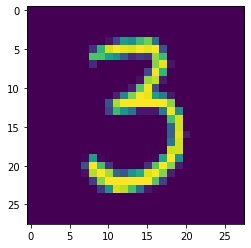

In [49]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [53]:
# image를 numpy 배열로 변환
imgArray = np.array(image)
imgArray = imgArray / 255

# 2차원인 배열을 1차원으로 변환
imgArray2 = imgArray.reshape(-1)
imgArray2.shape

(784,)

In [54]:
imgArray3 = imgArray2.tolist()

In [57]:
dfArray = pd.DataFrame(imgArray3).T
dfArray

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
print("예측값 :",np.argmax(model.predict(dfArray),axis=1))

1/1 [==============================] - 0s 60ms/step
예측값 : [3]
